In [4]:
#imports
from code_file.imports_and_libraries import *
from code_file.dataset_creation import *
from code_file.positional_encodings import *
from code_file.models import *
from code_file.train_and_test import *
from code_file.visualizations import *

import inspect

Configuration

In [5]:
import code_file.configuration as cfg
print(inspect.getsource(cfg))

from pathlib import Path
import numpy as np


SEED = 177013               #seed for reproducibility
NUM_OF_SAMPLES = 1000       #number of samples in dataset
TIME_INTERVAL = [0.0, 2*np.pi]      #interval for time
DISCR_OF_TIME = 100         #level of time discretization
OMEGA_MIN = 0.5             #minimal value for frequency (omega)
OMEGA_MAX = 10              #maximal value for frequency (omega)
AMPLITUDE_MIN = 1           #minimal value for amplitude (A)
AMPLITUDE_MAX = 1           #maximal value for amplitude (A)

EPOCHS = 200 


PLOTS_DIR = Path("plots/rep02-diff-w-and-discretization")
PLOTS_DIR.mkdir(parents=True, exist_ok=True)





- Seed is constant for reproducibility for everything (for dataset, for torch...)
- setup model, criterion, optimizer and scheduler

In [6]:
#setup for reproducibility and device
set_seed()
device = set_device()

#setup for model and more
model = TransformerModel1(seq_len=DISCR_OF_TIME, d_model=128, nhead=4, num_layers=2, dim_f=256, dropout=0.1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

Seed: 177013
cuda


- Creating dataset, from np.arrays dataset to tensor dataset
- splitting data into training, validation and test parts

In [7]:
#creating dataset and converting to tensor dataset
V_np, tar_np, t_np = make_sine_dataset()
ds_full = from_array_to_tensor_dataset(V_np, tar_np)

#splitting to train, val and test parts
train_loader, val_loader, test_loader = split_and_load(ds_full)

- Training and evaluation step
- Test step with hardwritten 200 epochs

In [8]:
#training and validation steps
model, train_mse_hist, val_mse_hist = train_and_eval_training(train_loader, val_loader, device, model, criterion, optimizer, scheduler)

#test step
test_mse, test_mae = evaluate(test_loader, model, device)
print(f"Test MSE {test_mse:.6f}, MAE {test_mae:.6f}")

Epoch  10; Train MSE 0.103867, MAE 0.265295; Val MSE 0.115331, MAE 0.276380
Epoch  20; Train MSE 0.017595, MAE 0.101587; Val MSE 0.016824, MAE 0.101402
Epoch  30; Train MSE 0.009414, MAE 0.074430; Val MSE 0.009935, MAE 0.079720
Epoch  40; Train MSE 0.005529, MAE 0.059588; Val MSE 0.006558, MAE 0.062409
Epoch  50; Train MSE 0.003341, MAE 0.043004; Val MSE 0.004364, MAE 0.051175
Epoch  60; Train MSE 0.004123, MAE 0.050353; Val MSE 0.004675, MAE 0.053089
Epoch  70; Train MSE 0.002623, MAE 0.039951; Val MSE 0.003260, MAE 0.044691
Epoch  80; Train MSE 0.010228, MAE 0.083743; Val MSE 0.009923, MAE 0.079830
Epoch  90; Train MSE 0.002203, MAE 0.036224; Val MSE 0.003003, MAE 0.043570
Epoch 100; Train MSE 0.001468, MAE 0.030015; Val MSE 0.001883, MAE 0.033722
Epoch 110; Train MSE 0.002316, MAE 0.040161; Val MSE 0.002572, MAE 0.041631
Epoch 120; Train MSE 0.001970, MAE 0.036975; Val MSE 0.002172, MAE 0.039463
Epoch 130; Train MSE 0.002887, MAE 0.042754; Val MSE 0.003314, MAE 0.045417
Epoch 140; T

- Plot for predicted w versus real w
- Plot for loss function across train and validation parts

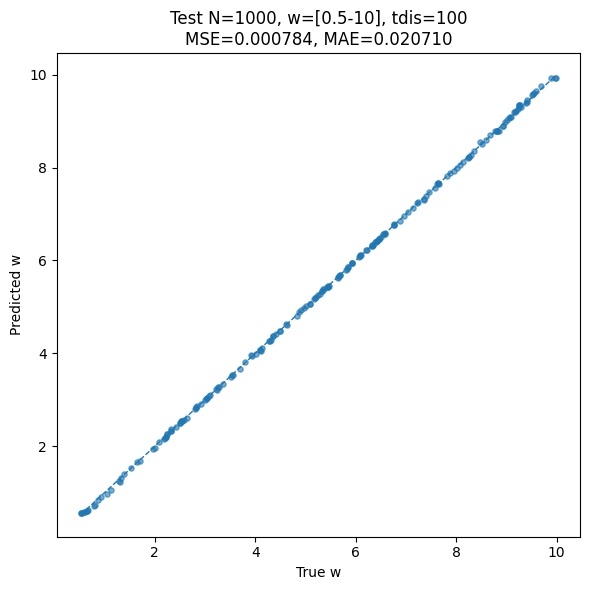

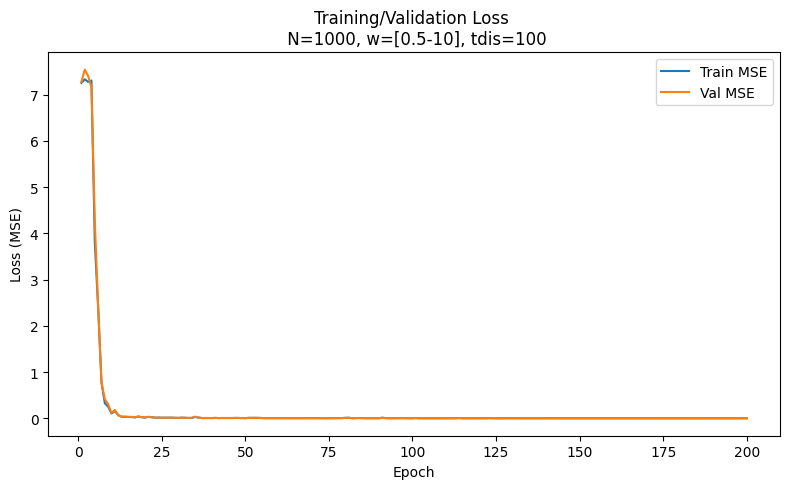

In [9]:
#plotting data collection
y_true, y_pred = prediction_collecter_plot(test_loader, model, device)

#plots - without saving, only showing
plot_pred_vs_true(y_true, y_pred, test_mse, test_mae, show_plot=True)
plot_loss_curves(train_mse_hist, val_mse_hist, show_plot=True)

- Below are experiments with same seed - but different w an t_dis - there are different datasets (expectedly), but everything else is the same (run conditions for shuffling, ... are the same)

- Example with t_disc=10 and w=[0,10] → w=[0.1,10] → w=[0.5,10]

<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis10_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.1-10_N1000_tdis10_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.5-10_N1000_tdis10_seed177013_LOSSf.png" alt="Epoch sweep" width="450">

- Example with t_disc=20 and w=[0,10] → w=[0.1,10] → w=[0.5,10]

<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis20_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.1-10_N1000_tdis20_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.5-10_N1000_tdis20_seed177013_LOSSf.png" alt="Epoch sweep" width="450">

- Example with t_disc=30 and w=[0,10] → w=[0.1,10] → w=[0.5,10]

<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis30_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.1-10_N1000_tdis30_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.5-10_N1000_tdis30_seed177013_LOSSf.png" alt="Epoch sweep" width="450">

- Example with t_disc=50 and w=[0,10] → w=[0.1,10]

<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis50_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.1-10_N1000_tdis50_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> 

<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis50_seed177013_PREDvsREAL.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.1-10_N1000_tdis50_seed177013_PREDvsREAL.png" alt="Epoch sweep" width="450">

- Example with t_disc=100 and w=[0,10] → w=[0.1,10] → w=[0.5,10]

<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis100_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.1-10_N1000_tdis100_seed177013_LOSSf.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.5-10_N1000_tdis100_seed177013_LOSSf.png" alt="Epoch sweep" width="450">

<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis100_seed177013_PREDvsREAL.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.1-10_N1000_tdis100_seed177013_PREDvsREAL.png" alt="Epoch sweep" width="450"> <img src="plots\rep02-diff-w-and-discretization\T1_w0.5-10_N1000_tdis100_seed177013_PREDvsREAL.png" alt="Epoch sweep" width="450">

- when discussing limit values about w~0 and w~10 at small t_dis


<img src="plots\rep02-diff-w-and-discretization\T1_w0.0-10_N1000_tdis20_seed177013_PREDvsREAL.png" alt="Epoch sweep" width="450">


- Different epochs for w in [0.5,10] with time discretization 100 and samples in dataset N=1000

Seed: 177013
cuda
max_ep= 20 -> best_epoch= 11, best_val=0.032492, test_mse=0.034685
Seed: 177013
cuda
max_ep= 30 -> best_epoch= 24, best_val=0.011633, test_mse=0.011458
Seed: 177013
cuda
max_ep= 40 -> best_epoch= 31, best_val=0.010689, test_mse=0.010834
Seed: 177013
cuda
max_ep= 50 -> best_epoch= 31, best_val=0.028416, test_mse=0.024127
Seed: 177013
cuda
max_ep= 60 -> best_epoch= 50, best_val=0.005970, test_mse=0.004995
Seed: 177013
cuda
max_ep= 70 -> best_epoch= 61, best_val=0.004267, test_mse=0.005417
Seed: 177013
cuda
max_ep= 80 -> best_epoch= 65, best_val=0.001734, test_mse=0.001971
Seed: 177013
cuda
max_ep= 90 -> best_epoch= 54, best_val=0.006366, test_mse=0.005854
Seed: 177013
cuda
max_ep=100 -> best_epoch= 90, best_val=0.001654, test_mse=0.001873
Seed: 177013
cuda
max_ep=120 -> best_epoch=100, best_val=0.013597, test_mse=0.012659
Seed: 177013
cuda
max_ep=140 -> best_epoch= 88, best_val=0.001146, test_mse=0.000935
Seed: 177013
cuda
max_ep=160 -> best_epoch=132, best_val=0.000338

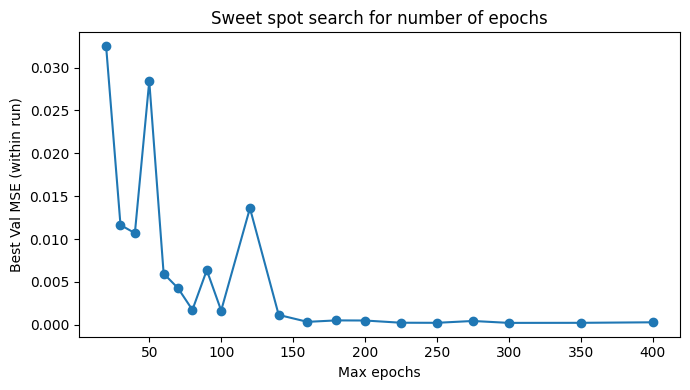

In [12]:
from analysis import *

diff_epoch = [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 225, 250, 275, 300, 350, 400]

epoch_sweep(diff_epoch)